<a href="https://colab.research.google.com/github/DinisMartinho/This-Cat-Does-Not-Exist/blob/main/Colab%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U --no-cache-dir gdown --pre
import torch, torchvision, tqdm, matplotlib.pyplot

In [2]:
# GPU is necessary to run this notebook.
use_collab_gpu = True #@param {type:"boolean"}

In [3]:
if use_collab_gpu == True:
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
else:
  device = torch.device("cpu")

In [4]:
class Generator(torch.nn.Module):
  def __init__(self, z_dim, channels_img, features_g):
    super(Generator, self).__init__()

    self.gen = torch.nn.Sequential(self._block(z_dim, features_g*16, 4, 1, 0),
                                   self._block(features_g*16, features_g*8, 4, 2, 1),
                                   self._block(features_g*8, features_g*4, 4, 2, 1),
                                   self._block(features_g*4, features_g*2, 4, 2, 1),
                                   torch.nn.ConvTranspose2d(features_g*2, channels_img, 4, 2, 1),
                                   torch.nn.Tanh(),
                                  )
  
  def _block(self, in_channels, out_channels, kernel_size, stride, padding):
    return torch.nn.Sequential(
        torch.nn.ConvTranspose2d(in_channels, out_channels, kernel_size, stride, padding, bias=False),
        torch.nn.BatchNorm2d(out_channels),
        torch.nn.ReLU(0.2),
        )


  def forward(self, x):
    return self.gen(x)

In [5]:
gen = Generator(100, 3, 64).to(device)

In [ ]:
!gdown --no-cookies 182G9oY1T8LeVz354FP3SVbai3ucxRrZk # Download pre-trained weights.

In [14]:
gen.load_state_dict(torch.load("./Pre-Trained Model Generator.pth")) # Load the weights.

<All keys matched successfully>

In [15]:
# To denorm the final outputted image.
stats = (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)

In [26]:
noise = torch.randn(64, 100, 1, 1).to(device) # Create random noise.

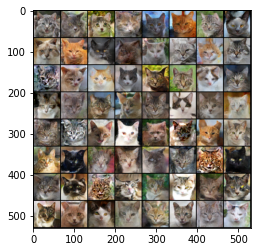

In [27]:
with torch.no_grad():
  output_img = (gen((noise))) * stats[1][0] + stats[0][0]
torchvision.utils.save_image(output_img, "output_img.png")

# Display fixed noise output:
img = matplotlib.image.imread("output_img.png")
imgplot = matplotlib.pyplot.imshow(img)
matplotlib.pyplot.show()